# Data Cleaning and Exploratory Data Analysis (EDA):

## Importing Libraries:

In this part of the code, we'll import the necessary libraries that we'll use throughout your analysis. These libraries include NumPy, Pandas, Matplotlib, Seaborn, and various components from Scikit-Learn.

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## Data Loading and Initial Inspection:
We'll load the breast cancer dataset using Pandas and then dropping the 'id' column as it likely doesn't provide any meaningful information for the analysis.

In [21]:
# Load dataset
breast = pd.read_csv('breast cancer.csv')
breast = breast.drop('id', axis=1)

In [22]:
# Let's see the first 5 rows of the dataset
breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Understanding Data Structure:
We will check the basic structure of the dataset using the .info() method to see the data types of columns and any missing values.

In [23]:
# Check basic information about the dataset
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Handling Missing Values:
We'll check for missing values in the dataset using .isna().sum() to identify columns with missing data. 

In [25]:
breast.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In this case, it looks like the 'Unnamed: 32' column is entirely missing.

## Removing Unnecessary Column:
Since the 'Unnamed: 32' column has no data, you're dropping it from the dataset.

In [26]:
# drop unnecessary columns
breast = breast.drop(columns=['Unnamed: 32'])

## Exploring Class Distribution:
You're using the .value_counts() method to get a count of unique values in the 'diagnosis' column, which represents the classes (Malignant and Benign) of breast cancer.

In [27]:
# Check the distribution of diagnoses
breast['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Visualizing Correlations:

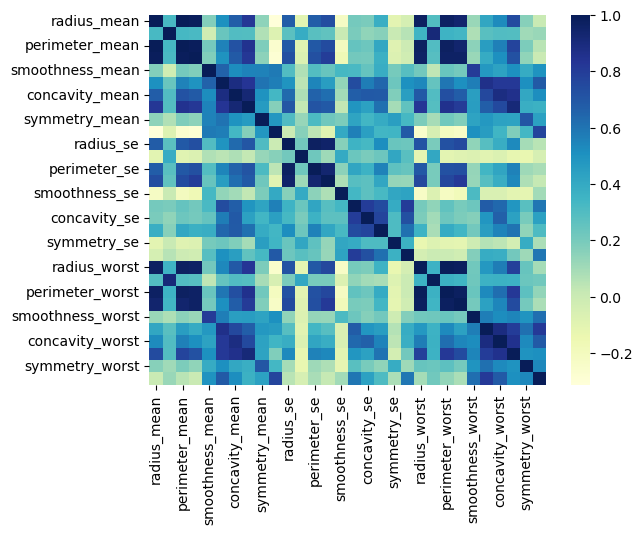

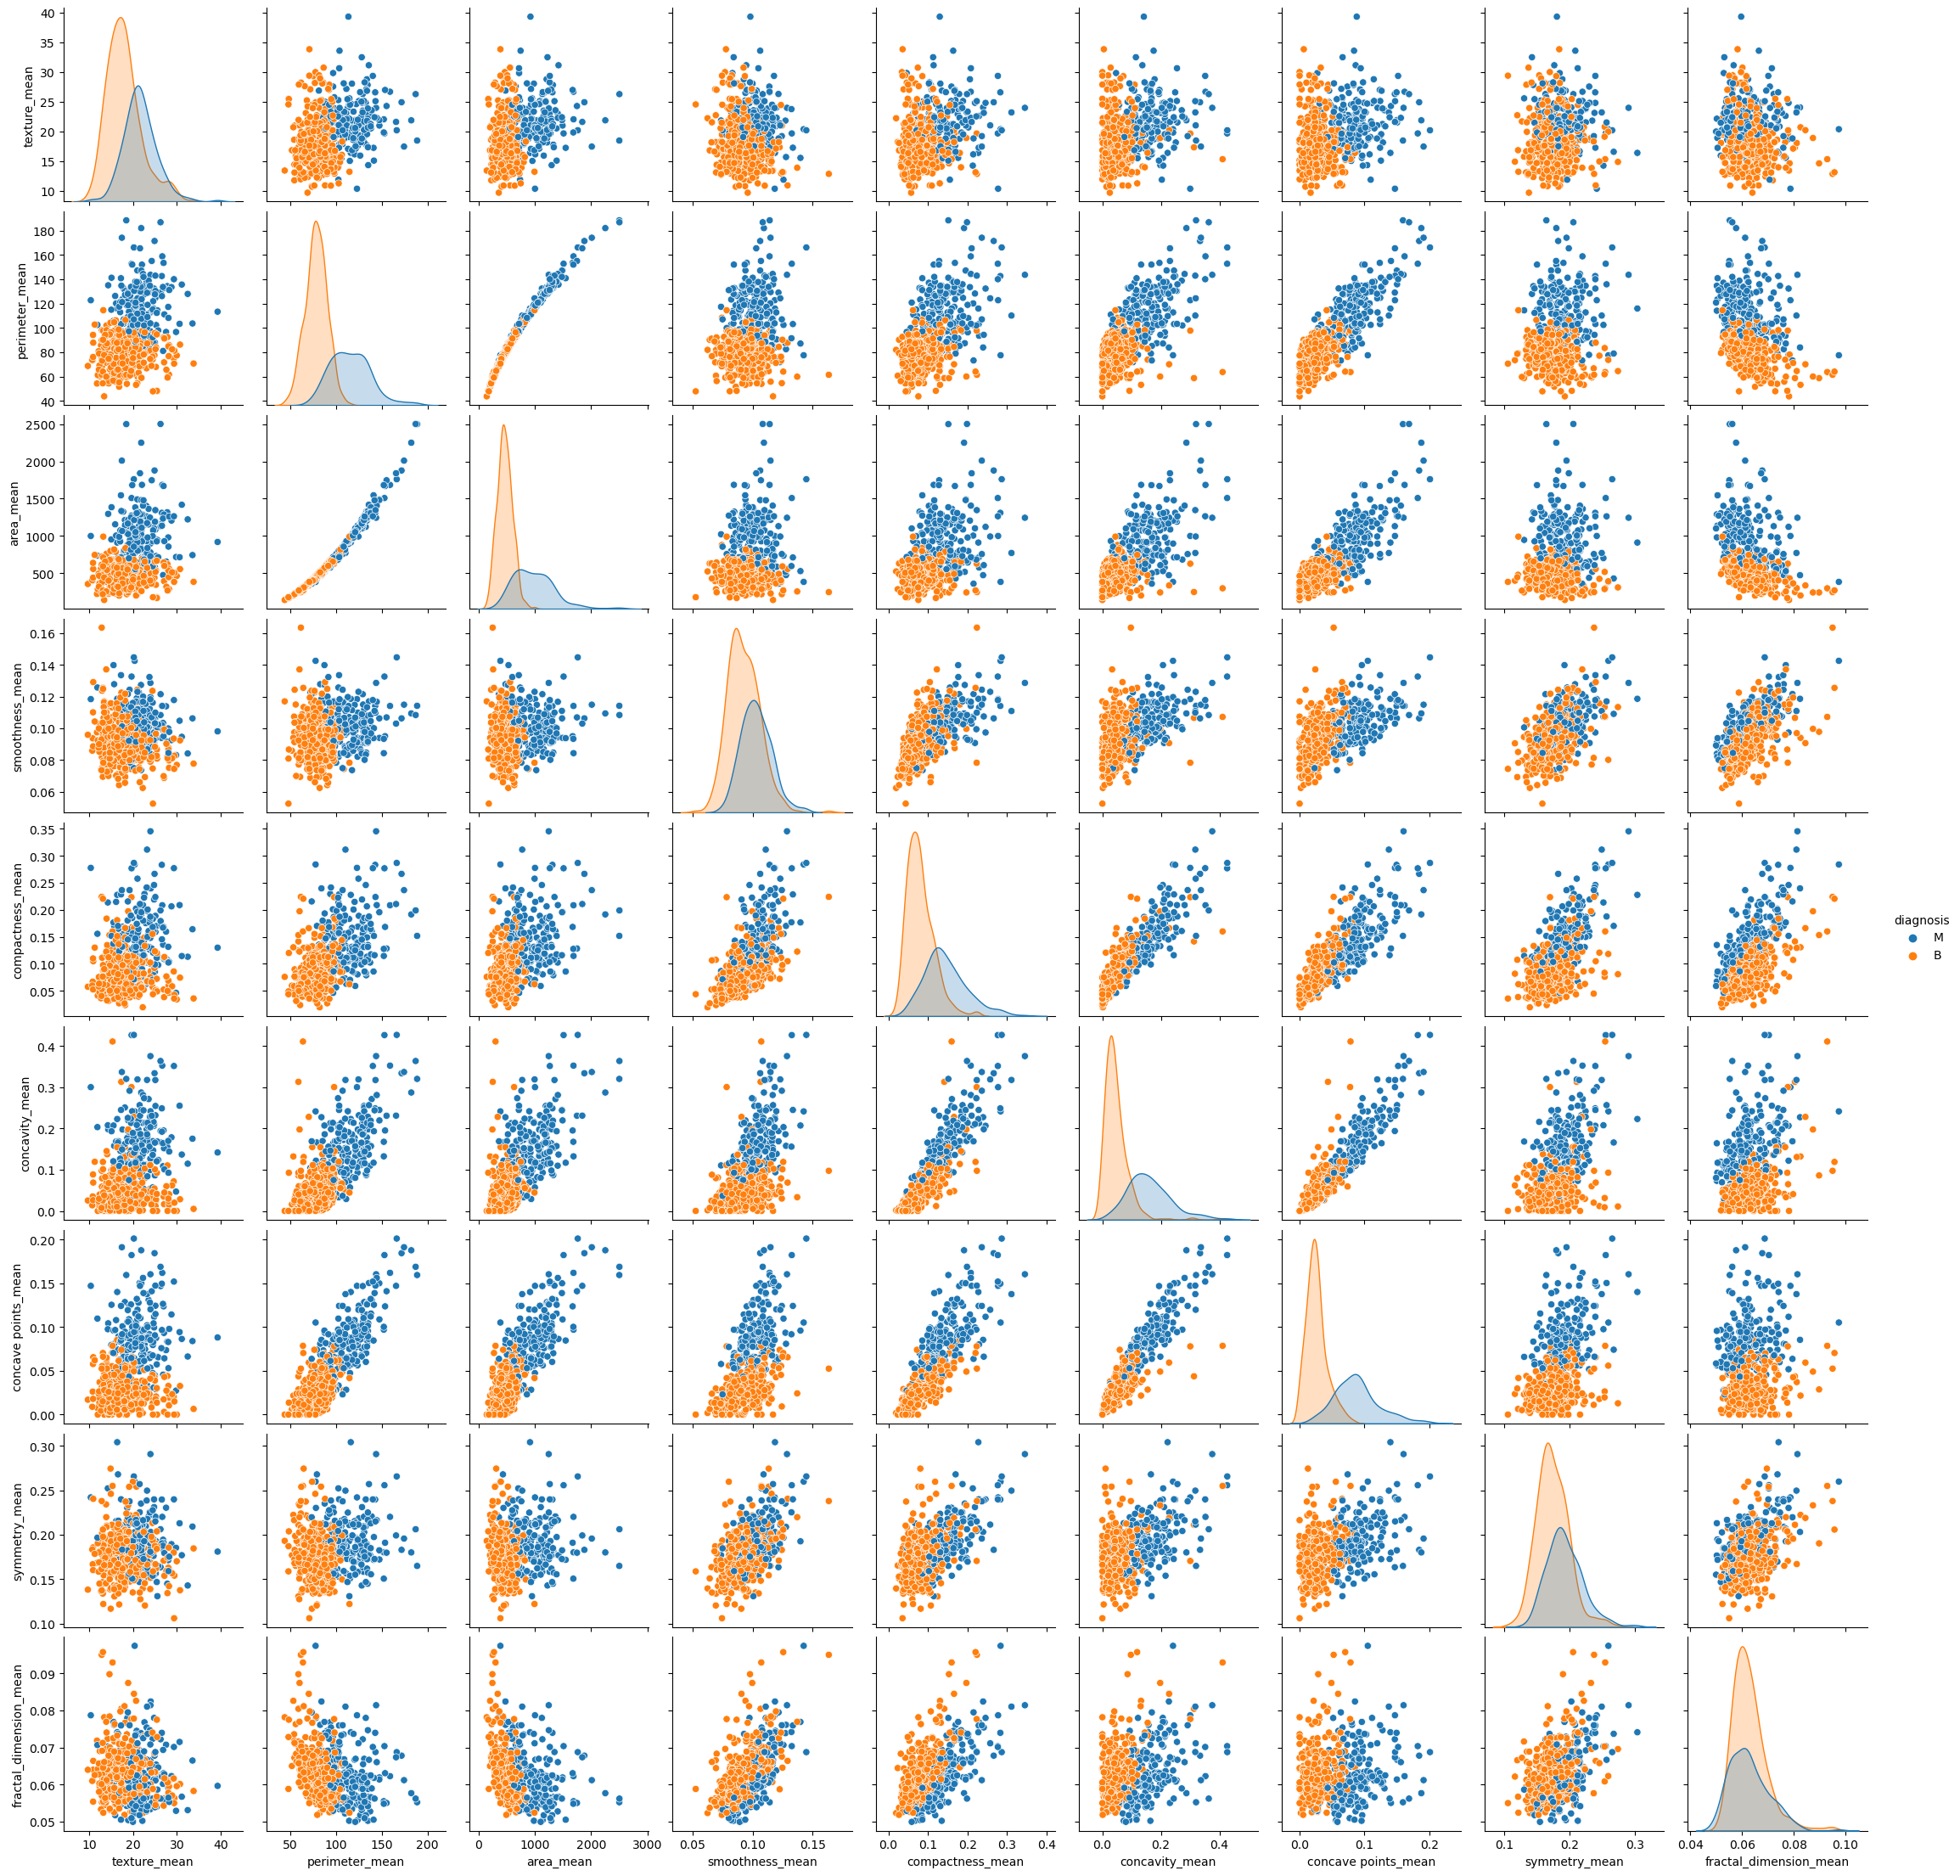

In [28]:
# We'll create a heatmap using Seaborn to visualize the correlations between numeric columns in the dataset 
# and use Seaborn's pairplot to create scatterplots between selected features (columns) of the dataset, differentiated 
# by the 'diagnosis' class.
sns.heatmap(breast.corr(numeric_only = True), cmap = 'YlGnBu')
sns.pairplot(breast, vars = breast.iloc[:, 2:11].columns, hue = 'diagnosis')
plt.show()

This completes the data cleaning and initial exploration of the dataset. The next step involves preprocessing the data for machine learning.

# Pre-processing

We'll convert the 'diagnosis' column to a categorical type and creating dummy variables using categorical codes. This is done to convert the categorical target variable into numerical format suitable for machine learning algorithms.

In [10]:
# create dummy variables

breast['diagnosis'] = breast['diagnosis'].astype('category')
codes = breast['diagnosis'].cat.codes
name_map = dict(zip(breast['diagnosis'], codes))
print(name_map)

breast['diagnosis'] = breast['diagnosis'].replace(name_map)

{'M': 1, 'B': 0}


Now we perform standardization on the feature data (excluding the target 'diagnosis' column) using Scikit-Learn's StandardScaler. This process transforms the features to have a mean of 0 and a standard deviation of 1, making them comparable and suitable for certain machine learning algorithms.

In [11]:
# standardization

print(breast.drop('diagnosis', axis = 1).var())

scaler = StandardScaler()
breast_scaled = pd.DataFrame(scaler.fit_transform(breast.drop('diagnosis', axis = 1)), columns = breast.drop('diagnosis', axis = 1).columns)
display(breast_scaled)
print(breast_scaled.var())

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


radius_mean                1.001761
texture_mean               1.001761
perimeter_mean             1.001761
area_mean                  1.001761
smoothness_mean            1.001761
compactness_mean           1.001761
concavity_mean             1.001761
concave points_mean        1.001761
symmetry_mean              1.001761
fractal_dimension_mean     1.001761
radius_se                  1.001761
texture_se                 1.001761
perimeter_se               1.001761
area_se                    1.001761
smoothness_se              1.001761
compactness_se             1.001761
concavity_se               1.001761
concave points_se          1.001761
symmetry_se                1.001761
fractal_dimension_se       1.001761
radius_worst               1.001761
texture_worst              1.001761
perimeter_worst            1.001761
area_worst                 1.001761
smoothness_worst           1.001761
compactness_worst          1.001761
concavity_worst            1.001761
concave points_worst       1

## Splitting Data into Training and Testing Sets:
We split the data into training and testing sets using train_test_split from Scikit-Learn. This is a crucial step in machine learning to ensure that you have separate datasets for training and evaluating your models.

In [12]:
X = breast_scaled.values
y = breast['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 123)
print(y)

[1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 0]
Length: 569
Categories (2, int64): [0, 1]


# Hyperparameter Tuning and Model Evaluation

Hyperparameter tuning for each model -> Finding Most Accuracy Model

Using K-Fold cross-validation to divide the dataset into multiple folds and then trained and evaluated your models on different subsets of the data. This process provides a more reliable assessment of your model's performance and helps us make informed decisions about model selection and hyperparameter tuning.

In [13]:
# cross-validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

- "KFold": This is a class from the sklearn.model_selection module that generates K-Fold cross-validation splits. K-Fold cross-validation involves splitting the dataset into K folds or subsets, and then using each fold as a testing set while the remaining folds act as the training set. This is done in a way that every fold gets a chance to be the testing set, and the model's performance is averaged across all folds.

- "n_splits": This parameter specifies the number of folds you want to create. In your case, we're using n_splits = 5, so the dataset will be divided into 5 folds.

- "shuffle": This parameter determines whether the data should be shuffled before splitting into folds. Shuffling the data is important to ensure that each fold represents a diverse portion of the dataset. Since you've set shuffle = True, the data will be shuffled before creating the folds.

- "random_state": This parameter allows us to set a random seed for reproducibility. By providing a fixed value (e.g., random_state = 123), we ensure that the same random shuffling and fold splitting will occur every time we run our code. This is important to ensure that our results are consistent and can be replicated.

We're using GridSearchCV to perform hyperparameter tuning for each of the classifier models you plan to use (K-Nearest Neighbors, Logistic Regression, Decision Tree, and Random Forest). GridSearchCV systematically searches through different hyperparameter combinations to find the best set of hyperparameters that result in the highest cross-validated accuracy.

Here's an example for the K-Nearest Neighbors (KNN) classifier:

In [14]:
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 21)}

knn_cv = GridSearchCV(knn, param_grid = params, cv = kf)
knn_cv.fit(X_train, y_train)

print('Tuned KNN parameters : {}'.format(knn_cv.best_params_))
print('Tuned KNN scores : {}'.format(knn_cv.best_score_))

Tuned KNN parameters : {'n_neighbors': 7}
Tuned KNN scores : 0.967246835443038


Let's do a similar procedure for the other classifiers as well.

Logistic Regression

In [15]:
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l2')
params = {'C':np.linspace(0.001, 1, 20), 'fit_intercept':[True, False]}

logreg_cv = GridSearchCV(logreg, param_grid = params, cv = kf)
logreg_cv.fit(X_train, y_train)

print('Tuned Logistic Regression parameters : {}'.format(logreg_cv.best_params_))
print('Tuned Logistic Regression scores : {}'.format(logreg_cv.best_score_))

Tuned Logistic Regression parameters : {'C': 0.1061578947368421, 'fit_intercept': False}
Tuned Logistic Regression scores : 0.9849367088607595


Decision Tree Classifier

In [16]:
tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [None, 5, 10],
          'min_samples_split': np.arange(2, 11),
          'min_samples_leaf': np.arange(1, 11)}

tree_cv = GridSearchCV(tree, param_grid = params, cv = kf)
tree_cv.fit(X_train, y_train)

print('Tuned Decision Tree parameters : {}'.format(tree_cv.best_params_))
print('Tuned Decision Tree scores : {}'.format(tree_cv.best_score_))

Tuned Decision Tree parameters : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 10}
Tuned Decision Tree scores : 0.9397151898734177


Random Forest Classifier

In [17]:
forest = RandomForestClassifier()
params = {'n_estimators' : np.arange(10, 101, 10),
          'random_state': [123]}

forest_cv = GridSearchCV(forest, param_grid = params, cv = kf)
forest_cv.fit(X_train, y_train)

print('Tuned Random Forest parameters : {}'.format(forest_cv.best_params_))
print('Tuned Random Forest scores : {}'.format(forest_cv.best_score_))

Tuned Random Forest parameters : {'n_estimators': 30, 'random_state': 123}
Tuned Random Forest scores : 0.9573417721518988


## Model Comparison Visualization

Now, let's create a boxplot to compare the cross-validated accuracy scores of each model. This visualization helps us understand how each model performs in terms of accuracy across different folds of the cross-validation.

[array([0.9875    , 0.9875    , 0.9625    , 0.93670886, 0.96202532]), array([0.9875    , 0.975     , 0.9875    , 1.        , 0.97468354]), array([0.95      , 0.925     , 0.925     , 0.93670886, 0.97468354]), array([0.9875    , 0.9375    , 0.925     , 0.96202532, 0.97468354])]


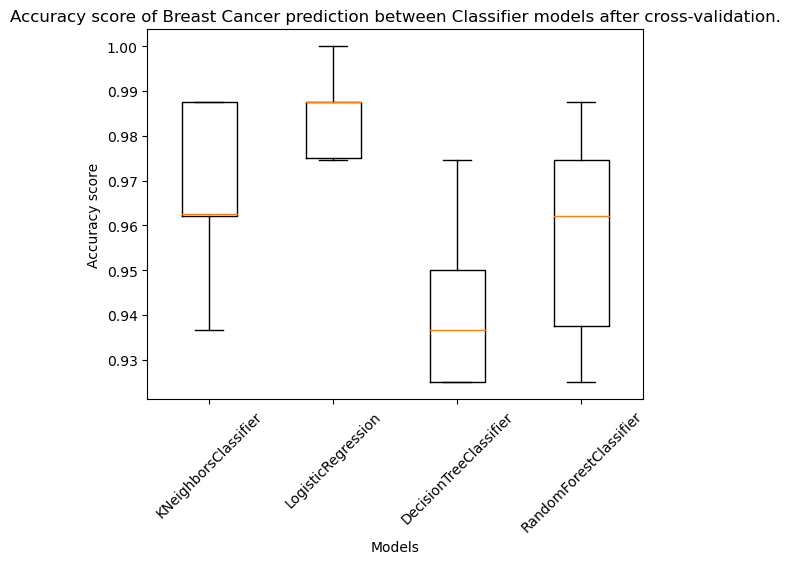

In [18]:
models = {'KNeighborsClassifier':KNeighborsClassifier(n_neighbors = 7), 
          'LogisticRegression':LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.1061578947368421, fit_intercept = False),
          'DecisionTreeClassifier':DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 5),
          'RandomForestClassifier':RandomForestClassifier(n_estimators = 30, random_state = 123)
         }
results = []
for model in models.values() :
    kf = KFold(n_splits = 5, shuffle = True, random_state = 123)
    cv_score = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_score)
print(results)

plt.boxplot(results, labels = models.keys())
plt.xlabel('Models')
plt.xticks(rotation = 45)
plt.ylabel('Accuracy score')
plt.title('Accuracy score of Breast Cancer prediction between Classifier models after cross-validation.')
plt.show()

Then loop through the trained models, fit them to the training data, and evaluate their performance on the testing data. For each model, we calculate the accuracy, generate a classification report, and plot the ROC curve along with its Area Under the Curve (AUC) score.

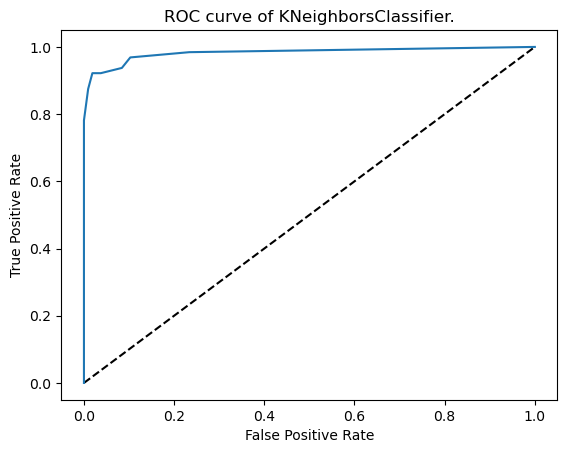

Area under ROC curve : 0.982768691588785
Accuracy score : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171




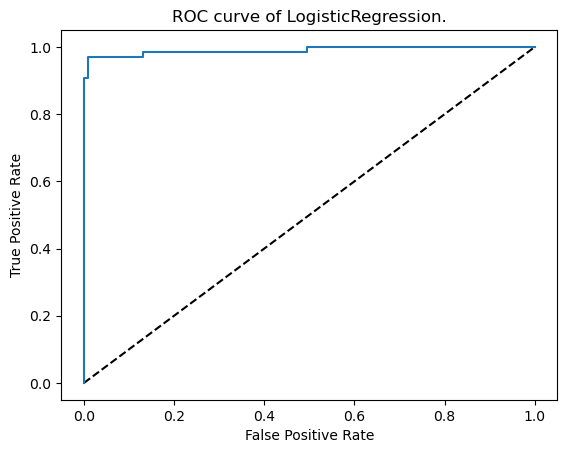

Area under ROC curve : 0.9896320093457944
Accuracy score : 0.9590643274853801
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       107
           1       0.93      0.97      0.95        64

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171




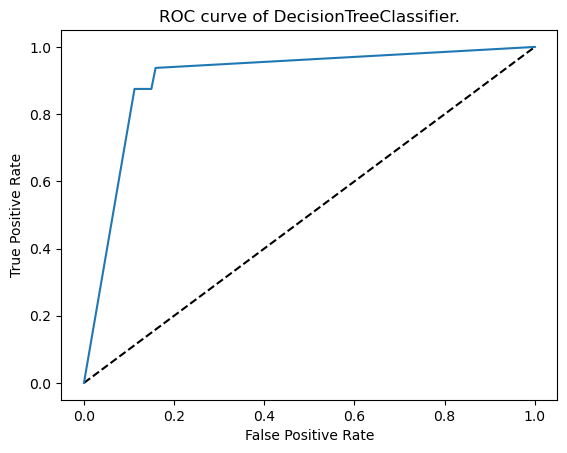

Area under ROC curve : 0.9050817757009346
Accuracy score : 0.8596491228070176
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       107
           1       0.78      0.88      0.82        64

    accuracy                           0.86       171
   macro avg       0.85      0.86      0.85       171
weighted avg       0.87      0.86      0.86       171




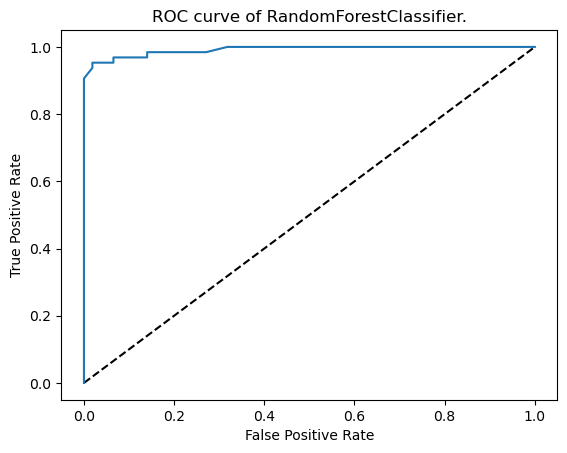

Area under ROC curve : 0.9916033878504673
Accuracy score : 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171




In [19]:
for name, model in models.items() :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.title('ROC curve of {}.'.format(name))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    print('Area under ROC curve :', roc_auc_score(y_test, y_pred_probs))
    print('Accuracy score :', accuracy)
    print(report)
    print()